In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np

import pandas as pd
from matplotlib.ticker import LogFormatter 
from scipy.optimize import curve_fit
from pathlib import Path
import matplotlib.colors
from matplotlib import ticker, cm
import pickle

#%matplotlib notebook

In [2]:
data = pd.read_csv("Ising/Test_for_canonicalModel/all.txt", sep=" ")
#data

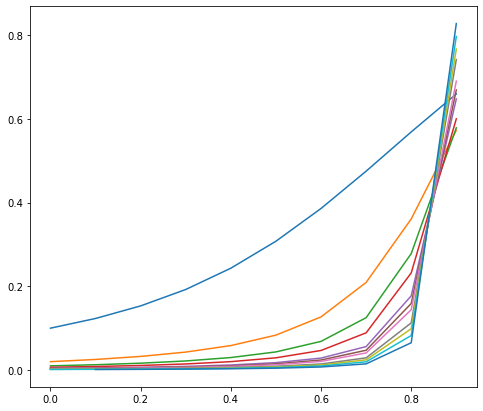

In [3]:
data_np = np.loadtxt("Ising/Test_for_canonicalModel/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])


fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111)


for l in lengths:
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    
    mag = data_l[:,15]
 

    plt.plot(J_l, mag)

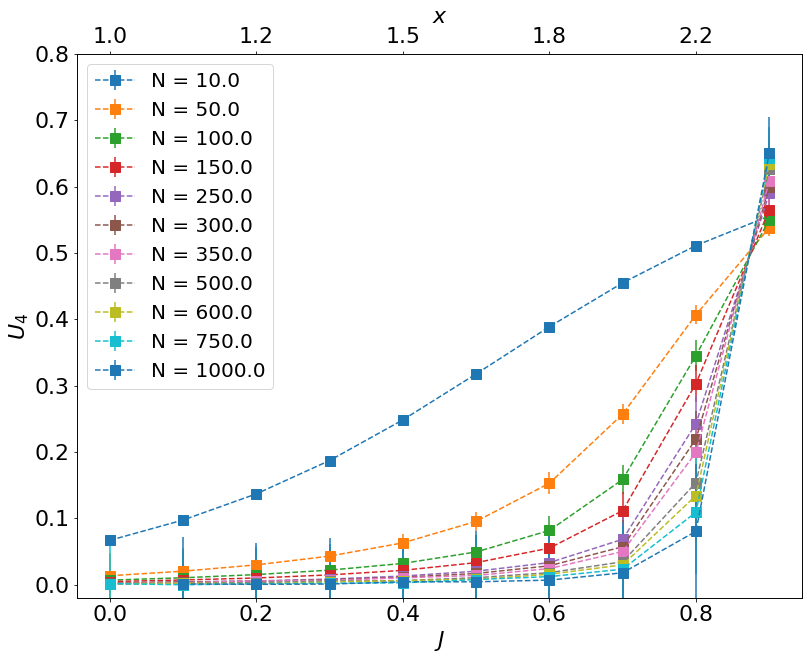

In [4]:
data_np = np.loadtxt("Ising/Test_for_canonicalModel/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


for l in lengths:
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    
    bc = 1 - data_l[:,17]/3/data_l[:,15]/data_l[:,15]
    errs = (2*data_l[:,16] / data_l[:,15])**2 + (data_l[:,18] /data_l[:,17])
    errs=np.sqrt(errs)

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ U_4 $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
plt.ylim(-0.02, 0.8)



plt.legend(loc="best", fontsize=20)
 
ax2 = ax.twiny() 
ax2.set_xlabel(r'$x$', fontsize=22)
ax2.set_xticks(np.arange(0,11,2)/10)
ax2.tick_params(axis='x', labelsize=22)
ax2.set_xbound(ax.get_xbound())
ax2.set_xticklabels( np.round( np.exp(np.arange(0, 11, 2)/10), 1) )

plt.savefig("/home/kamilla/Lattice_models/img/bcfar_canonical.png")

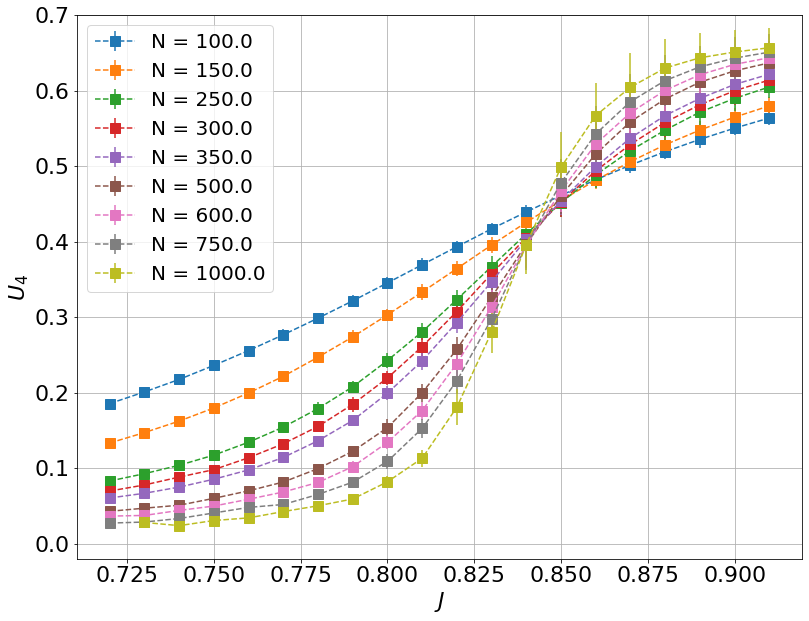

In [5]:
data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


for l in lengths:
    if (l<100):
        continue
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    
    bc = 1 - data_l[:,17]/3/data_l[:,15]/data_l[:,15]
    errs = (2*data_l[:,16] / data_l[:,15])**2 + (data_l[:,18] /data_l[:,17])
    errs=np.sqrt(errs)*bc

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([0.72, J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ U_4 $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
plt.ylim(-0.02, 0.7)

plt.grid()

plt.legend(loc="best", fontsize=20)
 
#ax2 = ax.twiny() 
#ax2.set_xlabel(r'$x$', fontsize=22)
#ax2.set_xticks(np.arange(0,11,2)/10)
#ax2.tick_params(axis='x', labelsize=22)
#ax2.set_xbound(ax.get_xbound())
#ax2.set_xticklabels( np.round( np.exp(np.arange(0, 11, 2)/10), 1) )

plt.savefig("/home/kamilla/Lattice_models/img/bcfar_canonical_deeper.png")


plt.savefig("/home/kamilla/Lattice_models/Seminar_24_02_2020/bcfar_canonical_deeper.png")

(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(19,)


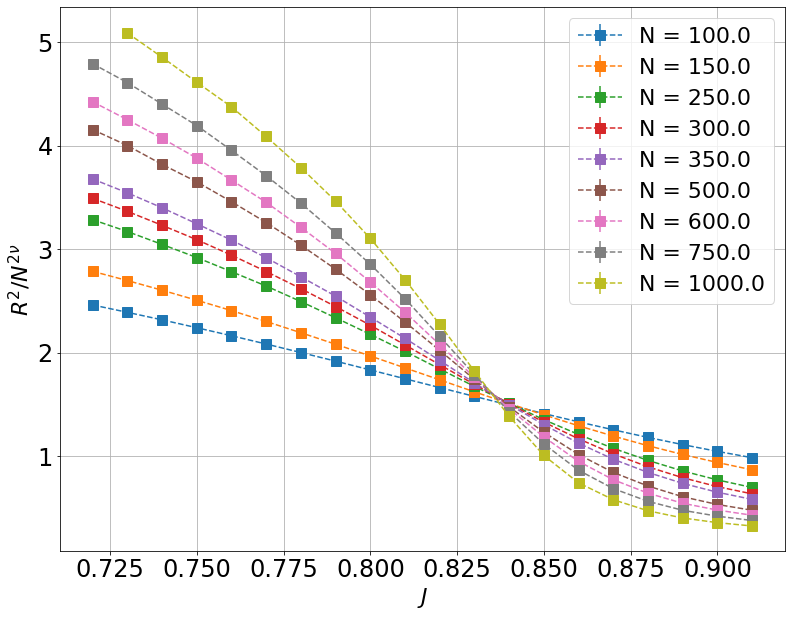

In [6]:
data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

nu=4/7

for l in lengths:
    if (l<100):
        continue
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    r_l = data_l[:, 3]
    
    bc = r_l/np.power(l, 2*nu)
    print(bc.shape, )
    
    errs = data_l[:, 4]/np.power(l, 2*nu)

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{4}{7}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ R^2/N^{2 \nu} $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=24) 
plt.tick_params(axis='y', labelsize=24) 
#plt.ylim(-0.02, 0.8)


plt.legend(fontsize=22)

plt.grid()

plt.savefig("/home/kamilla/Lattice_models/img/rscaling.png")

plt.savefig("/home/kamilla/Lattice_models/Seminar_24_02_2020/rscaling.png")

In [7]:
def r_on_n(n, nu, b):
    
    
    return 2*nu*n+b

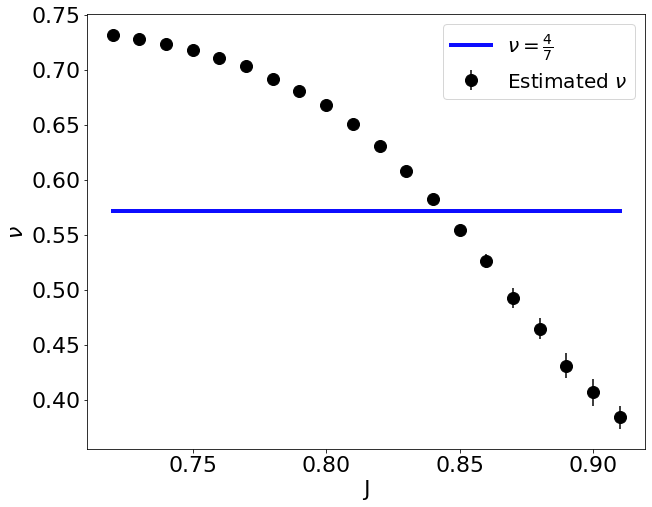

In [8]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)


data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=1)

J_l = np.unique(data_np[:, 1])


k1=1
k2=1

e=len(J_l)
v = np.zeros(e)
sigmas = np.zeros(e)

i=0
for J in J_l :
    data_l = data_np[data_np[:,1]==J]
    
    data_l = data_l[data_l[:,0]>99]
    #print(data_l)
    n_saw = data_l[:, 0]
    
    mean_r = data_l[:,3]
    err_r = data_l[:,4] 
    popt, pcov = curve_fit(r_on_n, np.log(n_saw+k2), np.log(mean_r+k1), sigma=err_r )  
    v[i] = popt[0]
    perr = np.sqrt(np.diag(pcov))

    
    perr = np.sqrt(np.diag(pcov))
    sigmas[i] =perr[0]
    i+=1
    
    
plt.errorbar( J_l, v , yerr=sigmas, fmt="o", ms = 12,c="k", label = r"Estimated $\nu$")


plt.plot([J_l[0], J_l[-1]], [4/7, 4/7], "-", label=r"$\nu=\frac{4}{7}$", c="b",lw=4, alpha=0.95)

plt.xlabel(r'J', fontsize = 22)
plt.ylabel(r"$\nu$ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#ax.set_xticks(np.arange(0, 1, 0.1))

theta = 1.0/1.18

#plt.plot([theta], [4.0/7.0], "*", c= "purple", ms=15)

plt.legend(loc="best", fontsize=20)
    

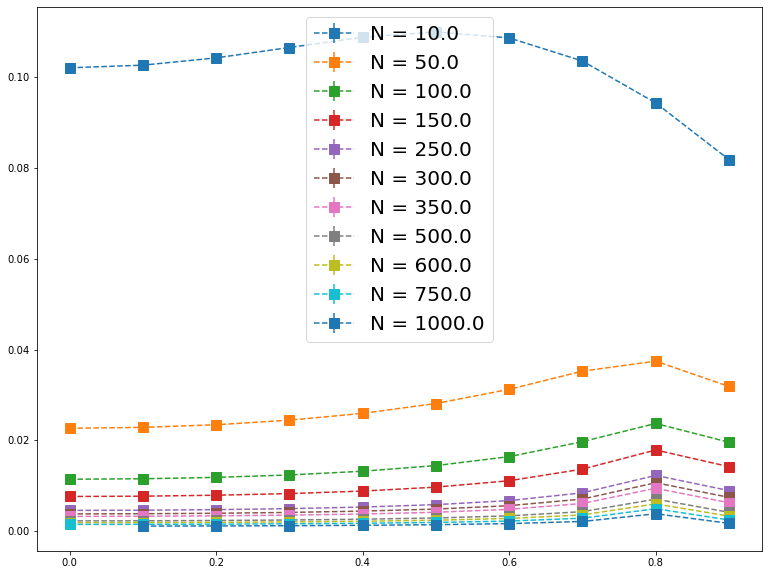

In [9]:
data_np = np.loadtxt("Ising/Test_for_canonicalModel/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


for l in lengths:
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    
    bc = data_l[:,9] - data_l[:,7]*data_l[:,7]
    errs = np.zeros_like(J_l)#(2*data_l[:,16] / data_l[:,15])**2 + (data_l[:,18] /data_l[:,17])
    errs=np.sqrt(errs)

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{4}{7}$", c="b",lw=4, alpha=0.95)


plt.legend(loc="best", fontsize=20)

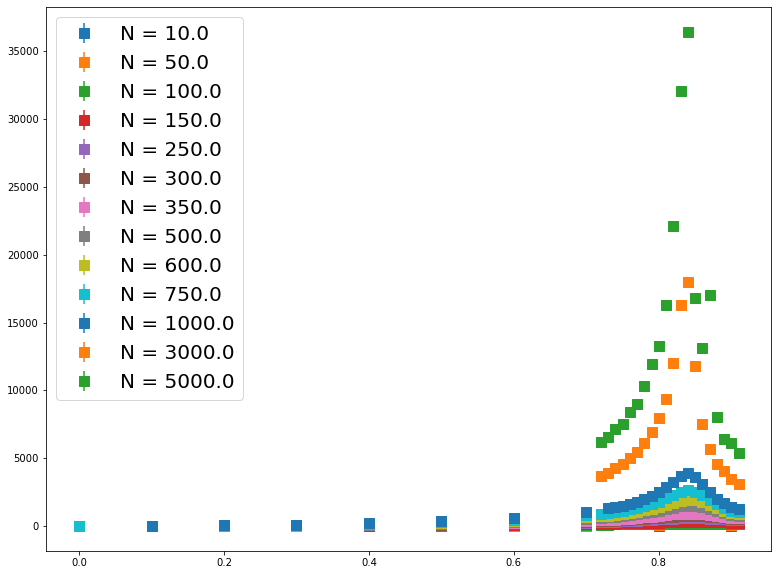

In [10]:
data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)
data_np1 = np.loadtxt("Ising/Test_for_canonicalModel/all.txt", skiprows=1)
data_np=np.vstack((data_np, data_np1))
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


for l in lengths:
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    
    bc = (data_l[:,9] - data_l[:,7]*data_l[:,7])*np.square(J_l)*l*l
    errs = np.zeros_like(J_l)#(2*data_l[:,16] / data_l[:,15])**2 + (data_l[:,18] /data_l[:,17])
    errs=np.sqrt(errs)

    plt.errorbar(J_l, bc, yerr=errs, fmt="s", ms = 10, label = "N = " + str(l))
 
#plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{4}{7}$", c="b",lw=4, alpha=0.95)


plt.legend(loc="best", fontsize=20)

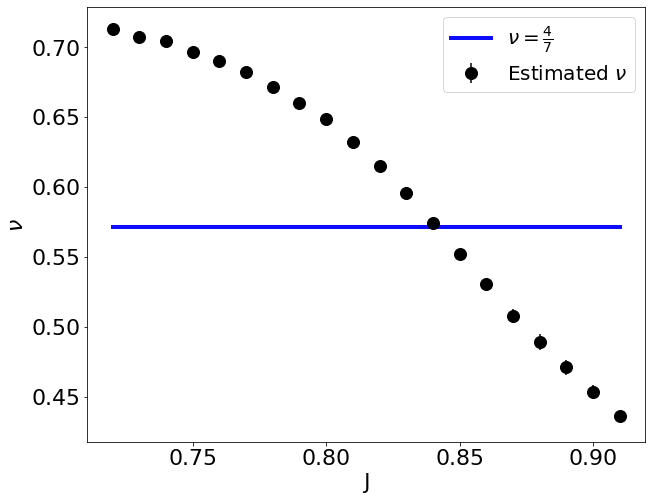

In [11]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)


data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)

J_l = np.unique(data_np[:, 1])


k1=1
k2=1

e=len(J_l)
v = np.zeros(e)
sigmas = np.zeros(e)

i=0
for J in J_l :
    data_l = data_np[data_np[:,1]==J]
    
    data_l = data_l[data_l[:,0]>99]
    #print(data_l)
    n_saw = data_l[:, 0]
    
    mean_r = data_l[:,5]
    err_r = data_l[:,6] 
    popt, pcov = curve_fit(r_on_n, np.log(n_saw+k2), np.log(mean_r+k1), sigma=err_r )  
    v[i] = popt[0]
    perr = np.sqrt(np.diag(pcov))

    
    perr = np.sqrt(np.diag(pcov))
    sigmas[i] =perr[0]
    i+=1
    
    
plt.errorbar( J_l, v , yerr=sigmas, fmt="o", ms = 12,c="k", label = r"Estimated $\nu$")


plt.plot([J_l[0], J_l[-1]], [4/7, 4/7], "-", label=r"$\nu=\frac{4}{7}$", c="b",lw=4, alpha=0.95)

plt.xlabel(r'J', fontsize = 22)
plt.ylabel(r"$\nu$ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#ax.set_xticks(np.arange(0, 1, 0.1))

theta = 1.0/1.18

#plt.plot([theta], [4.0/7.0], "*", c= "purple", ms=15)

plt.legend(loc="best", fontsize=20)
    

[Text(0.0, 1, '1.0'),
 Text(0.2, 1, '1.2'),
 Text(0.4, 1, '1.5'),
 Text(0.6, 1, '1.8'),
 Text(0.8, 1, '2.2'),
 Text(1.0, 1, '2.7')]

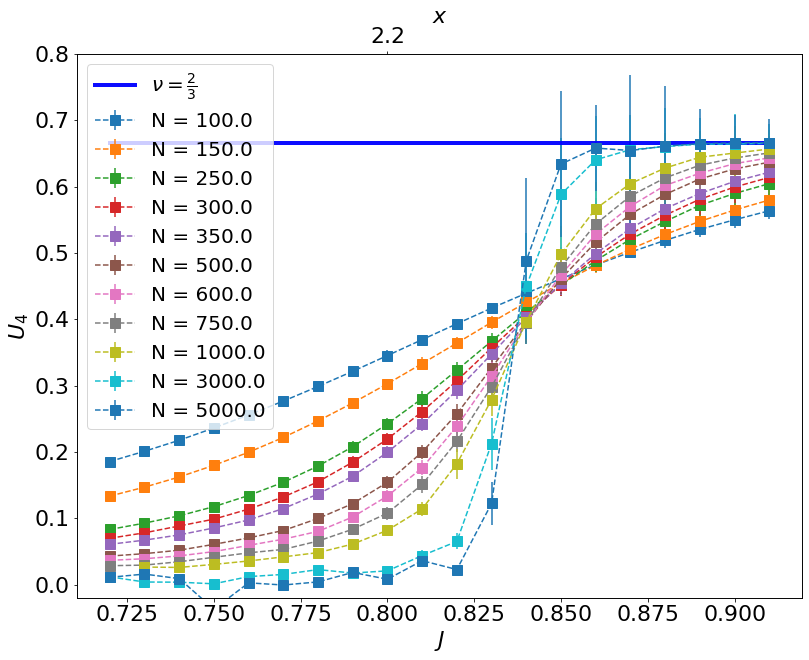

In [12]:
data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


for l in lengths:
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    
    bc = 1 - data_l[:,17]/3/data_l[:,15]/data_l[:,15]
  
    errs = (2*data_l[:,16] / data_l[:,15])**2 + (data_l[:,18] /data_l[:,17])
    errs=np.sqrt(errs)*bc

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ U_4 $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
plt.ylim(-0.02, 0.8)



plt.legend(loc="best", fontsize=20)
 
ax2 = ax.twiny() 
ax2.set_xlabel(r'$x$', fontsize=22)
ax2.set_xticks(np.arange(0,11,2)/10)
ax2.tick_params(axis='x', labelsize=22)
ax2.set_xbound(ax.get_xbound())
ax2.set_xticklabels( np.round( np.exp(np.arange(0, 11, 2)/10), 1) )



-0.026923076923076925


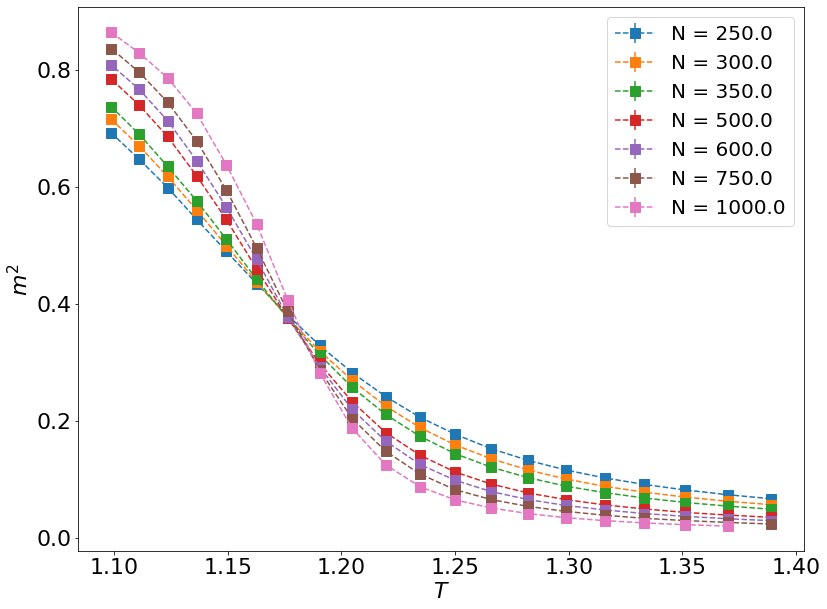

In [128]:
data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=1)
#data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

Tc = 1/0.85
 
gamma = 7/4 # 7/4
nu = 65 #55  #7/1.5

 
power = -gamma/nu
 
print(power)
for l in lengths:
    
    if (l<250):
        continue
    
    L = np.sqrt(l)
    #L = l
    
    data_l = data_np[data_np[:,0]==l]
    J_l = 1/data_l[:, 1]
    
    m2 = data_l[:,15] 
    
    x = np.abs(J_l-Tc)
    x = J_l-Tc
    #y = m2/J_l*np.power(L, -8/7)
    y = m2 
    
    
    errs = data_l[:,16]*y

    #plt.plot(x*np.power(L, 1/nu), y, "s--", ms = 10, label = "N = " + str(l))
    plt.errorbar(J_l  , y, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{4}{7}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$T$', fontsize = 22)
plt.ylabel(r"$ m^2  $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.xlim(-20, 20)

#plt.axvline(x=0, c="k" )

plt.legend(loc="best", fontsize=20)
 

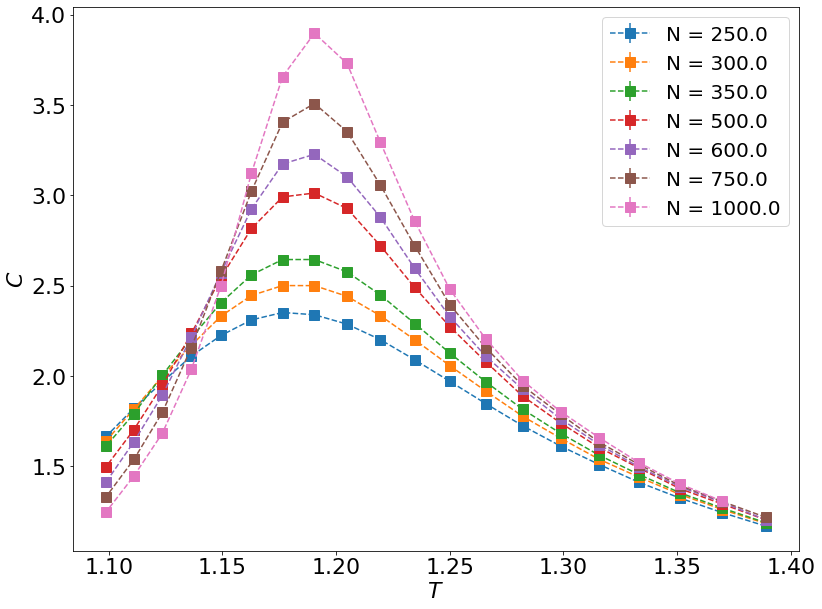

In [188]:
data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=1)
#data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

Tc = 1/0.835
 
 
gamma = 9/3.5
nu= 3.5
power = -gamma/nu


 
for l in lengths:
    
    if (l<250):
        continue
    
    L = np.sqrt(l)
    #L = l
    
    data_l = data_np[data_np[:,0]==l]
    J_l = 1/data_l[:, 1]
    
    m2 = data_l[:,17]/J_l
    
    
    m2 = (data_l[:,9] - data_l[:,7]*data_l[:,7])*np.square(1/J_l)*l
    
    x = np.abs(J_l-Tc)
    x = J_l-Tc
    #y = m2/J_l*np.power(L, -8/7)
    y = m2 
    
    
    errs = data_l[:,16]*y

    #plt.plot(x*np.power(L, 1/nu), y, "s--", ms = 10, label = "N = " + str(l))
    plt.errorbar(J_l, y, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{4}{7}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$T$', fontsize = 22)
plt.ylabel(r"$ C  $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.xlim(-20, 20)

#plt.axvline(x=0, c="k" )

plt.legend(loc="best", fontsize=20)
 

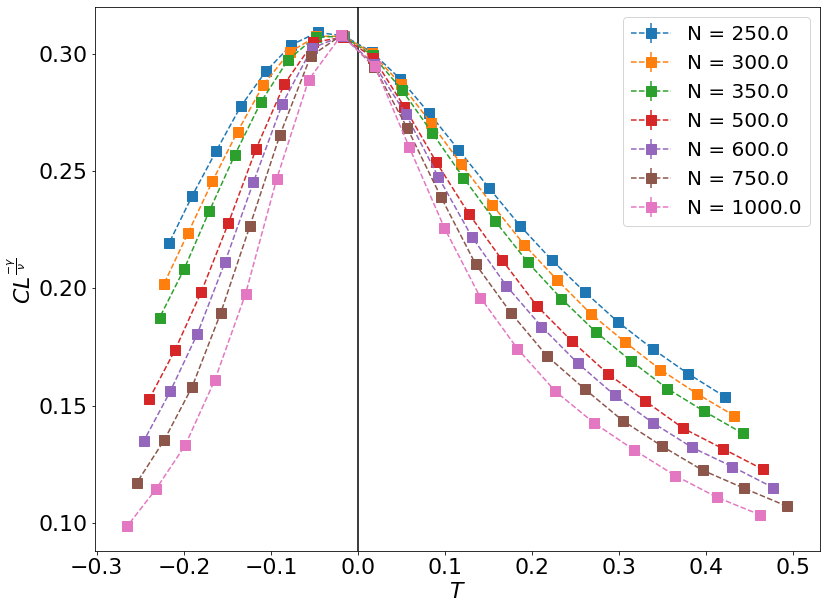

In [189]:
data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=1)
#data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

Tc = 1/0.835
 
 
gamma = 9/3.5
nu= 3.5
power = -gamma/nu


 
for l in lengths:
    
    if (l<250):
        continue
    
    L = np.sqrt(l)
    #L = l
    
    data_l = data_np[data_np[:,0]==l]
    J_l = 1/data_l[:, 1]
    
    m2 = data_l[:,17]/J_l
    
    
    m2 = (data_l[:,9] - data_l[:,7]*data_l[:,7])*np.square(1/J_l)*l
    
    x = np.abs(J_l-Tc)
    x = J_l-Tc
    #y = m2/J_l*np.power(L, -8/7)
    y = m2*np.power(L, power)
    
    
    errs = data_l[:,16]*y

    #plt.plot(x*np.power(L, 1/nu), y, "s--", ms = 10, label = "N = " + str(l))
    plt.errorbar(x*np.power(L, 1/nu), y, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{4}{7}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$T$', fontsize = 22)
plt.ylabel(r"$ C L ^{\frac{-\gamma}{\nu}}$ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.xlim(-20, 20)

plt.axvline(x=0, c="k" )

plt.legend(loc="best", fontsize=20)
 

-0.03888888888888889


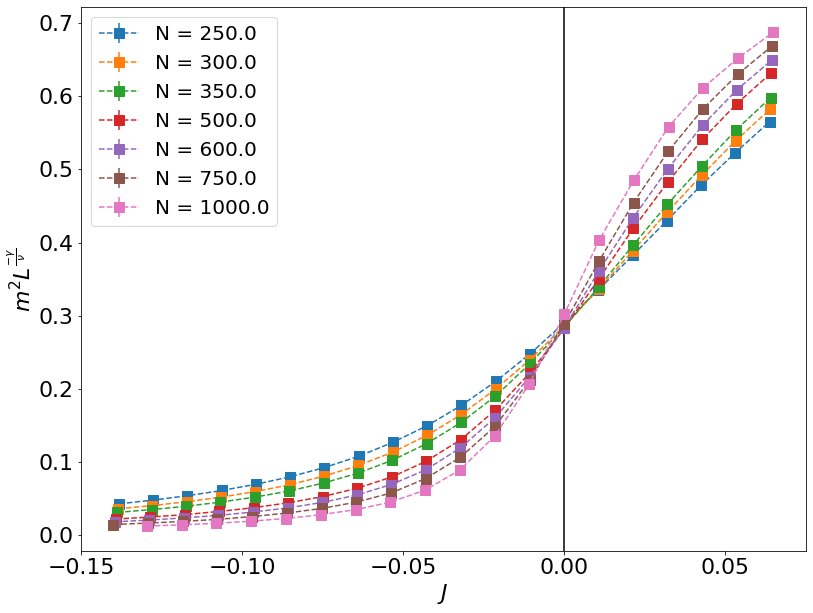

In [115]:
data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=1)
#data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

Tc = 1/0.865
Tc = 0.85
gamma = 7/4 # 7/4
nu = 45 #55  #7/1.5

power = -gamma/nu


print(power)
for l in lengths:
    
    if (l<250):
        continue
    
    L = np.sqrt(l)
    #L = l
    
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    
    m2 = data_l[:,15]*J_l
    
    x = np.abs(J_l-Tc)
    x = J_l-Tc
    #y = m2/J_l*np.power(L, -8/7)
    y = m2*np.power(L, power)
    
    errs = data_l[:,16]*y

    #plt.plot(x*np.power(L, 1/nu), y, "s--", ms = 10, label = "N = " + str(l))
    plt.errorbar(x*np.power(L, 1/nu), y, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{4}{7}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ m^2 L ^{\frac{-\gamma}{\nu}}$ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.xlim(-20, 20)

plt.axvline(x=0, c="k" )

plt.legend(loc="best", fontsize=20)
 


In [14]:
def r_in_theta_point(N, epsb_theta, a, b,fi ):
    epsb = 0.85
    
    #epsb = 0.6
    
    r_sq = a*np.power(N, 8.0/7.0) + b*np.power(N, fi) * (epsb-epsb_theta)
    #r_sq = a*np.power(N,  nu) + b*np.power(N, fi) * (epsb-epsb_theta)
    return r_sq



In [15]:
data_np = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
#fig = plt.figure(figsize=(13, 10))
#ax = fig.add_subplot(111)

data_l = data_np[data_np[:,1]==0.85]
data_l = data_l[data_l[:,0]> 99]
n_saw = data_l[:, 0] #np.sqrt(data_l[:, 0])
mean_r = data_l[:,5]
err_r = data_l[:,6] 



In [16]:

popt, pcov = curve_fit( r_in_theta_point, n_saw, mean_r, sigma=err_r, p0=[0.841, 1, 1, 11.0/7.0], absolute_sigma= False, maxfev=5000 )  


In [17]:
print(popt[0], np.sqrt(np.diag(pcov))[0])
print(popt[-1], np.sqrt(np.diag(pcov))[-1])
print(popt[-2], np.sqrt(np.diag(pcov))[-1])
theta = popt[0]
print(theta)

0.8015130345950111 nan
1.5034268144476268 0.08079186524079197
5.422822414971482 0.08079186524079197
0.8015130345950111


<ipython-input-17-3cf68f7b5536>:1: RuntimeWarning: invalid value encountered in sqrt
  print(popt[0], np.sqrt(np.diag(pcov))[0])
<ipython-input-17-3cf68f7b5536>:2: RuntimeWarning: invalid value encountered in sqrt
  print(popt[-1], np.sqrt(np.diag(pcov))[-1])
<ipython-input-17-3cf68f7b5536>:3: RuntimeWarning: invalid value encountered in sqrt
  print(popt[-2], np.sqrt(np.diag(pcov))[-1])


In [18]:
popt

array([0.80151303, 0.13189955, 5.42282241, 1.50342681])

In [19]:
err_r

array([1.17138e+03, 4.60819e-01, 2.11150e+00, 1.01227e+01, 2.00039e+01,
       3.50944e+01, 1.58120e+02, 1.75655e+02, 3.97367e+02])

In [20]:
n_saw

array([1000.,  100.,  150.,  250.,  300.,  350.,  500.,  600.,  750.])

<ErrorbarContainer object of 3 artists>

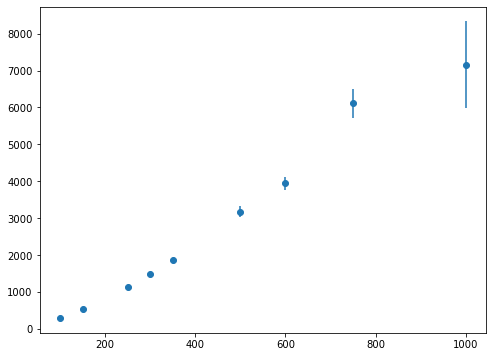

In [21]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)


plt.errorbar(n_saw, mean_r, yerr=err_r, fmt = "o")